In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gdown
url = "https://drive.google.com/file/d/1s6caFNRpyR9m7ZM6XEv_e8mcXT3_PnHS/view?usp=share_link"
output = "IT_data.h5"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1s6caFNRpyR9m7ZM6XEv_e8mcXT3_PnHS
From (redirected): https://drive.google.com/uc?id=1s6caFNRpyR9m7ZM6XEv_e8mcXT3_PnHS&confirm=t&uuid=0383b113-df45-4bdc-9c40-24aae540ec93
To: /home/maria/MousePipeline/dicarlo_pipeline/IT_data.h5
100%|██████████| 384M/384M [00:20<00:00, 18.4MB/s] 


'IT_data.h5'

In [4]:
import os
import h5py

def load_it_data(path_to_data):
    """ Load IT data

    Args:
        path_to_data (str): Path to the data

    Returns:
        np.array (x6): Stimulus train/val/test; objects list train/val/test; spikes train/val
    """
    path_to_data = ''

    datafile = h5py.File(os.path.join(path_to_data,'IT_data.h5'), 'r')

    stimulus_train = datafile['stimulus_train'][()]
    spikes_train = datafile['spikes_train'][()]
    objects_train = datafile['object_train'][()]
    
    stimulus_val = datafile['stimulus_val'][()]
    spikes_val = datafile['spikes_val'][()]
    objects_val = datafile['object_val'][()]
    
    stimulus_test = datafile['stimulus_test'][()]
    objects_test = datafile['object_test'][()]

    ### Decode back object type to latin
    objects_train = [obj_tmp.decode("latin-1") for obj_tmp in objects_train]
    objects_val = [obj_tmp.decode("latin-1") for obj_tmp in objects_val]
    objects_test = [obj_tmp.decode("latin-1") for obj_tmp in objects_test]

    return stimulus_train, stimulus_val, stimulus_test, objects_train, objects_val, objects_test, spikes_train, spikes_val

stimulus_train, stimulus_val, stimulus_test, objects_train, objects_val, objects_test, spikes_train, spikes_val=load_it_data(0)

In [ ]:

def visualize_img(stimulus,objects,stim_idx):
    """Visualize image given the stimulus and corresponding index and the object name.

    Args:
        stimulus (array of float): Stimulus containing all the images
        objects (list of str): Object list containing all the names
        stim_idx (int): Index of the stimulus to plot
    """    
    normalize_mean=[0.485, 0.456, 0.406]
    normalize_std=[0.229, 0.224, 0.225]

    img_tmp = np.transpose(stimulus[stim_idx],[1,2,0])

    ### Go back from normalization
    img_tmp = (img_tmp*normalize_std + normalize_mean) * 255

    plt.figure()
    plt.imshow(img_tmp.astype(np.uint8),cmap='gray')
    plt.title(str(objects[stim_idx]))
    plt.show()
    return

In [5]:
datafile = h5py.File(os.path.join('','IT_data.h5'), 'r')
datafile.keys()

<KeysViewHDF5 ['object_test', 'object_train', 'object_val', 'spikes_train', 'spikes_val', 'stimulus_test', 'stimulus_train', 'stimulus_val']>

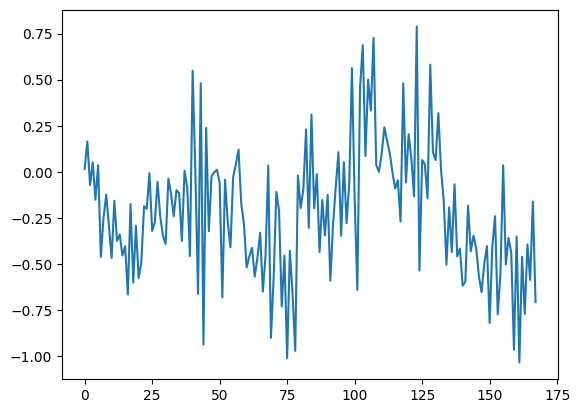

(array([ 1.,  1.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  2.,  0.,  1.,  1.,  0.,  1.,  4.,  2.,  1.,  1.,  3.,  4.,
         1.,  1.,  1.,  4.,  0., 10.,  3.,  3.,  6.,  2.,  2.,  6.,  2.,
         2.,  3.,  6.,  0.,  4.,  0.,  4.,  3.,  3.,  6.,  3.,  3.,  3.,
         3.,  5.,  3.,  3.,  6.,  4.,  6.,  2.,  3.,  1.,  4.,  1.,  0.,
         1.,  1.,  1.,  0.,  3.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  2.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([-1.03653932, -1.01828361, -1.00002789, -0.98177218, -0.96351641,
        -0.9452607 , -0.92700499, -0.90874928, -0.89049357, -0.87223786,
        -0.85398215, -0.83572638, -0.81747067, -0.79921496, -0.78095925,
        -0.76270354, -0.74444783, -0.72619212, -0.70793635, -0.68968064,
        -0.67142493, -0.65316921, -0.6349135 , -0.61665779, -0.59840208,
        -0.58014631, -0.5618906 , -0.54363489, -0.52537918, -0.507123

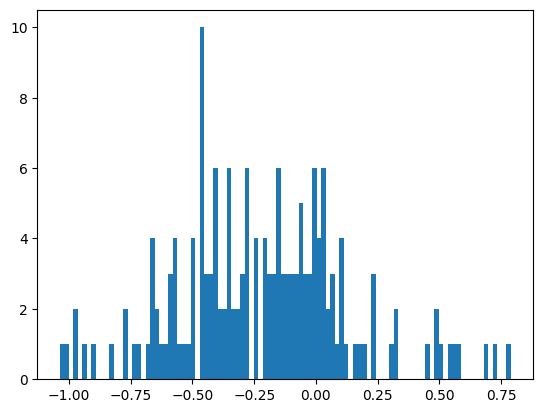

In [8]:
spikes_train

plt.plot(spikes_train[0]) 
plt.show()
plt.hist(spikes_train[0], bins=100)

In [9]:
from sklearn.decomposition import SparsePCA

pca= SparsePCA(n_components=10, alpha=0.1)

pca.fit(spikes_train)

pca.components_.shape

(10, 168)

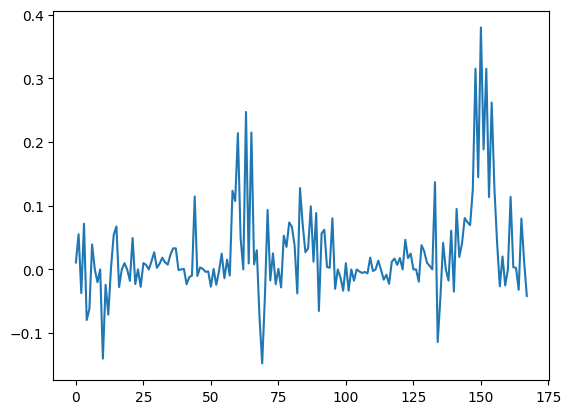

In [12]:
plt.plot(pca.components_[2])